In [1]:
import pandas as pd
titanic = pd.io.parsers.read_csv("Titanic.csv")

In [2]:
titanic.head()

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch
0,1,1st,survived,female,29.0000,0,0
1,2,1st,survived,male,0.9167,1,2
2,3,1st,died,female,2.0000,1,2
3,4,1st,died,male,30.0000,1,2
4,5,1st,died,female,25.0000,1,2


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
Unnamed: 0    1309 non-null int64
pclass        1309 non-null object
survived      1309 non-null object
sex           1309 non-null object
age           1309 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 71.7+ KB


In [4]:
titanic.iloc[[1]]

,Unnamed: 0,pclass,survived,sex,age,sibsp,parch
1,2,1st,survived,male,0.9167,1,2


In [5]:
titanic_df=titanic.drop('Unnamed: 0',1)

In [6]:
titanic_df.head()

,pclass,survived,sex,age,sibsp,parch
0,1st,survived,female,29.0000,0,0
1,1st,survived,male,0.9167,1,2
2,1st,died,female,2.0000,1,2
3,1st,died,male,30.0000,1,2
4,1st,died,female,25.0000,1,2


In [8]:
import numpy as np
msk = np.random.rand(len(titanic_df)) < 0.8

In [9]:
train_data=titanic_df.loc[msk]
test_data=titanic_df.loc[~msk]

In [10]:
print "the number of training data:",len(train_data)
print "the number of test data:",len(test_data)


the number of training data: 1038
the number of test data: 271


In [11]:
#firstly,let's check how the ages are distrivuted in this Data set!
import matplotlib.pyplot as plt
from numpy.random import normal
%matplotlib inline
total_people_ages=titanic_df[titanic_df['age']<=100]['age']

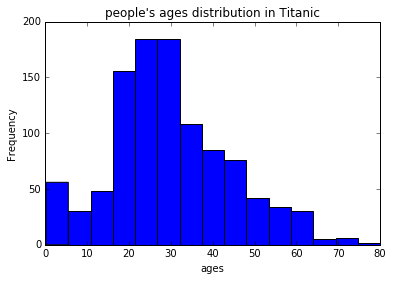

In [12]:
plt.hist(total_people_ages,bins=15)
plt.title("people's ages distribution in Titanic")
plt.xlabel("ages")
plt.ylabel("Frequency")
plt.show()

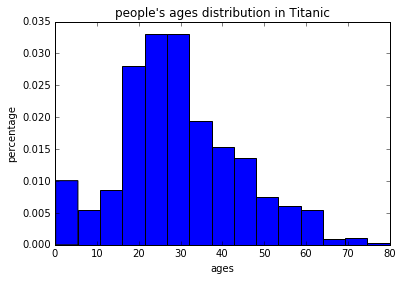

In [13]:
plt.hist(total_people_ages,bins=15,normed=True)
plt.title("people's ages distribution in Titanic")
plt.xlabel("ages")
plt.ylabel("percentage")
plt.show()

In [21]:
index_survived=titanic_df.survived=='survived'
index_died=titanic_df.survived=='died'

## let's explore survived people and died people based on different pclasses

In [43]:
pclass_survived_counts=titanic_df[index_survived].pclass.value_counts()
pclass_died_counts=titanic_df[index_died].pclass.value_counts()

In [47]:
#sort them 
pclass_survived_counts=pclass_survived_counts[0:3].sort_index()
pclass_died_counts=pclass_died_counts[0:3].sort_index()

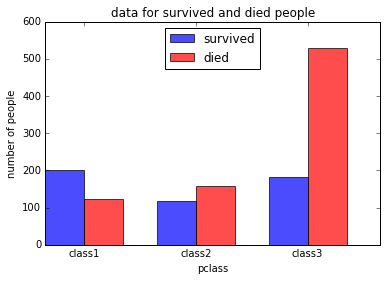

In [64]:
bar_width = 0.35
opacity=0.7
pclass = {1: 'class1', 2: 'class2', 3: 'class3'}
N=len(pclass_survived_counts)
plt1 = plt.bar(np.arange(N), pclass_survived_counts, bar_width,alpha=opacity,color='b',label='survived')
plt2=plt.bar(np.arange(N)+bar_width,pclass_died_counts,bar_width,alpha=opacity,color='r',label='died')
plt.xlabel('pclass')
plt.ylabel('number of people')
plt.title('data for survived and died people')
plt.xticks(np.arange(N)+bar_width, ('class1','class2','class3'))
plt.legend(loc='upper center')
plt.show()

# let's explore the data of the survived and died people based on sex

In [77]:
sex_survived_counts=titanic_df[index_survived].sex.value_counts()
sex_died_counts=titanic_df[index_died].sex.value_counts()

In [80]:
sex_survived_counts=sex_survived_counts.sort_index()
sex_died_counts=sex_died_counts.sort_index()

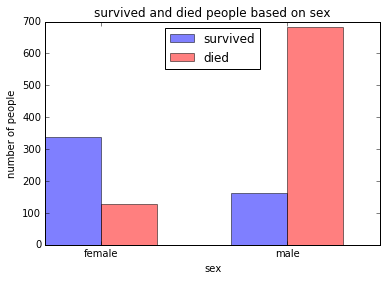

In [85]:
bar_width = 0.3
opacity=0.5
sex = {1: 'male', 2: 'female'}
N=len(sex_survived_counts)
plt1 = plt.bar(np.arange(N), sex_survived_ages, bar_width,alpha=opacity,color='b',label='survived')
plt2=plt.bar(np.arange(N)+bar_width,sex_died_counts,bar_width,alpha=opacity,color='r',label='died')
plt.xlabel('sex')
plt.ylabel('number of people')
plt.title('survived and died people based on sex')
plt.xticks(np.arange(N)+bar_width, ('female','male'))
plt.legend(loc='upper center')
plt.show()

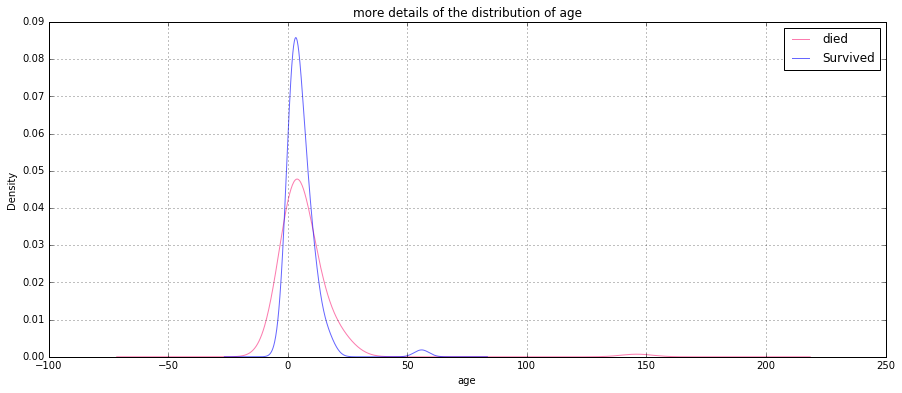

In [88]:
fig = plt.figure(figsize=(15, 6))

train_data[train_data.survived=='died'].age.value_counts().plot(kind='density', color='#FA2379', label='died', alpha=0.6)
train_data[train_data.survived=='survived'].age.value_counts().plot(kind='density', label='Survived', alpha=0.6)
plt.xlabel('age')
plt.title("more details of the distribution of age" )
plt.legend(loc='best')
plt.grid()

# looks we need to fix out data since there are some data in the titanic.csv which is not reasonable, assume we delete the data whose age is over 100 years old, and then to see what happen?

In [91]:
train_data=train_data[train_data.age<=100]
test_data=test_data[test_data.age<=100]

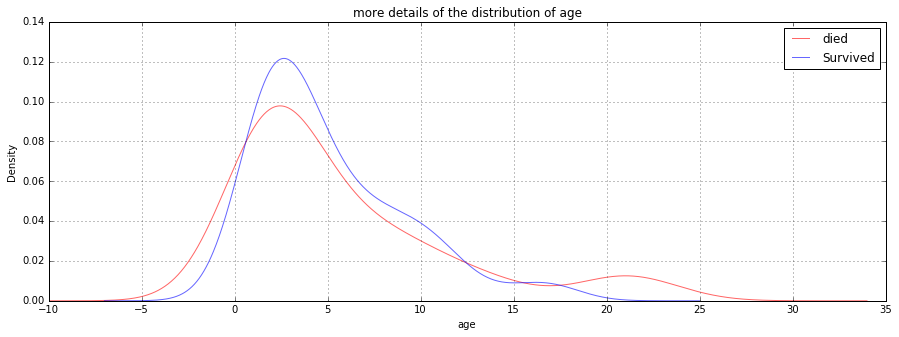

In [95]:
fig = plt.figure(figsize=(15, 5))

train_data[train_data.survived=='died'].age.value_counts().plot(kind='density', color='r', label='died', alpha=0.6)
train_data[train_data.survived=='survived'].age.value_counts().plot(kind='density', color='b',label='Survived', alpha=0.6)
plt.xlabel('age')
plt.title("more details of the distribution of age" )
plt.legend(loc='best')
plt.grid()